## Lecture 04               
                                       
Introduction to data-munging       
                                       
   - Add new manipulated variables     
   - Separate char to new variables    
   - Convert variables to numeric or factor               
   - Some string manipulations         
   - Rename variables                  
   - Filter out different observations 
     - conditional selection           
     - tabulate frequency of a var     
     - missing values                  
     - replace values                  
     - duplicates                      
   - Using pipes                
   - Sorting data                      
                                       
Case-study:                           
Based on: Chapter 02, A:              
    Finding a good deal among hotels: 
        data preparation              
                                      
Dataset:                              
  hotels-europe                       

Import packages

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

Import raw data

In [2]:
raw_df = pd.read_csv("https://osf.io/yzntm/download")

Have a look at the data

In [3]:
raw_df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0


### 1) Adding a new variable

Let us add nnights variable, which shows the number of nights spent in the hotel\
As the data was collected in such way, it is 1 for each observations.

You can assign a new variable using the following syntax

In [4]:
raw_df["nnights"] = 1

Or use the `assign` function of pandas and also create a new variable, lets call it `df`

In [5]:
df = raw_df.assign(nnights = 1)

Lets remove the raw data

In [6]:
del raw_df

### 2) Data cleaning - selecting a variable

You can select variables with `[]` brackets after the DataFrame object

In [7]:
df[["accommodationtype" , "price"]]

,accommodationtype,price
0,_ACCOM_TYPE@Hotel,172
1,_ACCOM_TYPE@Hotel,122
2,_ACCOM_TYPE@Hotel,122
3,_ACCOM_TYPE@Hotel,552
4,_ACCOM_TYPE@Hotel,122
...,...,...
149961,_ACCOM_TYPE@Hotel,119
149962,_ACCOM_TYPE@Hotel,109
149963,_ACCOM_TYPE@Hotel,109
149964,_ACCOM_TYPE@Hotel,446


Or use the `filter` function

In [8]:
df.filter(["accommodationtype" , "price"])

,accommodationtype,price
0,_ACCOM_TYPE@Hotel,172
1,_ACCOM_TYPE@Hotel,122
2,_ACCOM_TYPE@Hotel,122
3,_ACCOM_TYPE@Hotel,552
4,_ACCOM_TYPE@Hotel,122
...,...,...
149961,_ACCOM_TYPE@Hotel,119
149962,_ACCOM_TYPE@Hotel,109
149963,_ACCOM_TYPE@Hotel,109
149964,_ACCOM_TYPE@Hotel,446


You can also select columns with `filter` using Regular Expressions aka regex

In [9]:
df.filter(regex="rating")

,rating_reviewcount,starrating,rating2_ta,rating2_ta_reviewcount,guestreviewsrating
0,1030.0,4.0,4.0,1115.0,4.3 /5
1,1030.0,4.0,4.0,1115.0,4.3 /5
2,1030.0,4.0,4.0,1115.0,4.3 /5
3,1030.0,4.0,4.0,1115.0,4.3 /5
4,1030.0,4.0,4.0,1115.0,4.3 /5
...,...,...,...,...,...
149961,48.0,4.0,4.5,86.0,4.5 /5
149962,48.0,4.0,4.5,86.0,4.5 /5
149963,48.0,4.0,4.5,86.0,4.5 /5
149964,48.0,4.0,4.5,86.0,4.5 /5


### 3) separating character vector with a unique sign 

 Check accomotationtype: it is a character with a clear separator "@"

 To clean accommodationtype column: separate the characters at @ 
   and create two new variables: "garbage" and "acc_type".
 garbage will contain all characters before @ sign and acc_type will take everything after!

In [10]:
df["accommodationtype"]

0         _ACCOM_TYPE@Hotel
1         _ACCOM_TYPE@Hotel
2         _ACCOM_TYPE@Hotel
3         _ACCOM_TYPE@Hotel
4         _ACCOM_TYPE@Hotel
                ...        
149961    _ACCOM_TYPE@Hotel
149962    _ACCOM_TYPE@Hotel
149963    _ACCOM_TYPE@Hotel
149964    _ACCOM_TYPE@Hotel
149965    _ACCOM_TYPE@Hotel
Name: accommodationtype, Length: 149966, dtype: object

You can easily split and strip character columns wiht pandas with attaching the `str` function after column name

In [11]:
df["accommodationtype"].str.split("@")

0         [_ACCOM_TYPE, Hotel]
1         [_ACCOM_TYPE, Hotel]
2         [_ACCOM_TYPE, Hotel]
3         [_ACCOM_TYPE, Hotel]
4         [_ACCOM_TYPE, Hotel]
                  ...         
149961    [_ACCOM_TYPE, Hotel]
149962    [_ACCOM_TYPE, Hotel]
149963    [_ACCOM_TYPE, Hotel]
149964    [_ACCOM_TYPE, Hotel]
149965    [_ACCOM_TYPE, Hotel]
Name: accommodationtype, Length: 149966, dtype: object

This results in a Series of lists, each list contains the splitted parts of the original string. You can access the with the following syntax

In [12]:
df["accommodationtype"].str.split("@").str[0]

0         _ACCOM_TYPE
1         _ACCOM_TYPE
2         _ACCOM_TYPE
3         _ACCOM_TYPE
4         _ACCOM_TYPE
             ...     
149961    _ACCOM_TYPE
149962    _ACCOM_TYPE
149963    _ACCOM_TYPE
149964    _ACCOM_TYPE
149965    _ACCOM_TYPE
Name: accommodationtype, Length: 149966, dtype: object

In [13]:
df["accommodationtype"].str.split("@").str[1].str.strip()

0         Hotel
1         Hotel
2         Hotel
3         Hotel
4         Hotel
          ...  
149961    Hotel
149962    Hotel
149963    Hotel
149964    Hotel
149965    Hotel
Name: accommodationtype, Length: 149966, dtype: object

The second value in the lists contains the type of information about the accomodation type, lets create a new variable out of it.

In [14]:
df["acc_type"] = df["accommodationtype"].str.split("@").str[1].str.strip()
df["acc_type"].value_counts()

Hotel                  102234
Apartment               17113
Guest House             10080
Bed and breakfast        6395
Hostel                   6232
Apart-hotel              3693
Vacation home Condo      1576
Pension                  1085
Inn                      1020
Country House              89
Palace                     68
                           65
Villa                      64
Resort                     60
Caravan Park               60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    13
Chalet                     11
Castle                      5
All inclusive               5
Name: acc_type, dtype: int64

Its a good idea to use the `strip` function when splitting string variables as it removes any unnecessary white space

### Task - creating a numeric vector w simple separation

  1) Correct the `guestreviewsrating` variable into simple numeric variable\
  2) Check with `.dtypes` method\
  3) Convert the variable into a numeric variable


In [15]:
df["guestreviewsrating"].value_counts(dropna=False)

4 /5      23160
3.7 /5    15031
4.5 /5    14952
4.3 /5    11268
4.1 /5    11190
3.5 /5    11145
NaN       10587
4.4 /5     9079
3.9 /5     8853
3.2 /5     6112
3 /5       4838
4.6 /5     4417
3.4 /5     3727
4.8 /5     3095
5 /5       2646
2.7 /5     2337
2.5 /5     1557
2.9 /5     1213
4.9 /5     1157
2 /5        976
2.2 /5      976
1 /5        679
2.4 /5      472
1.7 /5      143
1.8 /5      112
1.5 /5       91
1.6 /5       54
1.2 /5       48
1.3 /5       41
1.1 /5       10
Name: guestreviewsrating, dtype: int64

In [16]:
df["ratings"] = df["guestreviewsrating"].str.split('/').str[0].str.strip()
df["ratings"].dtypes

dtype('O')

In [17]:
df["ratings"] = df["ratings"].astype(float)

In [18]:
df["ratings"].dtypes

dtype('float64')

### Task

Create numerical variables from the two distance measures:

In [19]:
df[["center1distance", "center2distance"]]

,center1distance,center2distance
0,3.1 miles,3.6 miles
1,3.1 miles,3.6 miles
2,3.1 miles,3.6 miles
3,3.1 miles,3.6 miles
4,3.1 miles,3.6 miles
...,...,...
149961,1.1 miles,0.6 miles
149962,1.1 miles,0.6 miles
149963,1.1 miles,0.6 miles
149964,1.1 miles,0.6 miles


We have two numeric values than the format of the distance "miles"

In [20]:
df["distance"] = df["center1distance"].str.strip().str.split().str[0].astype(float)
df["distance_alter"] = df["center2distance"].str.strip().str.split().str[0].astype(float)

Check results

<AxesSubplot:>

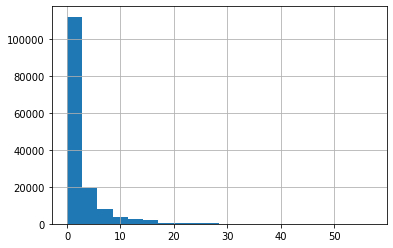

In [21]:
df["distance"].hist(bins=20)

### Rename variables

Using the rename` function, you have to specify in a dictionary that which columns you want to rename and their new names

In [22]:
df.filter(regex="rating")

,rating_reviewcount,starrating,rating2_ta,rating2_ta_reviewcount,guestreviewsrating,ratings
0,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
1,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
2,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
3,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
4,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
...,...,...,...,...,...,...
149961,48.0,4.0,4.5,86.0,4.5 /5,4.5
149962,48.0,4.0,4.5,86.0,4.5 /5,4.5
149963,48.0,4.0,4.5,86.0,4.5 /5,4.5
149964,48.0,4.0,4.5,86.0,4.5 /5,4.5


In [23]:
df = df.rename(columns={"rating_reviewcount": "rating_count", "rating2_ta": "ratingta"})

In [24]:
df.filter(regex="rating")

,rating_count,starrating,ratingta,rating2_ta_reviewcount,guestreviewsrating,ratings
0,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
1,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
2,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
3,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
4,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
...,...,...,...,...,...,...
149961,48.0,4.0,4.5,86.0,4.5 /5,4.5
149962,48.0,4.0,4.5,86.0,4.5 /5,4.5
149963,48.0,4.0,4.5,86.0,4.5 /5,4.5
149964,48.0,4.0,4.5,86.0,4.5 /5,4.5


### Task:
   
also rename the following variables as follows:
     
    rating2_ta_reviewcount: ratingta_count
    addresscountryname: "country
    starrating: stars
    s_city": city

In [25]:
df = df.rename(columns={
    "rating2_ta_reviewcount": "ratingta_count",
    "addresscountryname": "country",
    "starrating": "stars",
    "s_city": "city",
})

### Filtering observations

Use the `loc` function

In [26]:
df.shape

(149966, 29)

let us have only hotels

In [27]:
df.loc[df["acc_type"] == "Hotel"]

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,0% no offer,2017,11,1,0,1,Hotel,4.3,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,1,1,0,1,Hotel,4.3,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,1-15% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,2,1,0,1,Hotel,4.3,3.1,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149961,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,119,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.5,1.1,0.6
149962,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,...,15-50% offer,2018,4,1,0,1,Hotel,4.5,1.1,0.6
149963,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,...,15-50% offer,2018,3,1,0,1,Hotel,4.5,1.1,0.6
149964,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,446,price for 4 nights,...,15-50% offer,2017,12,0,1,1,Hotel,4.5,1.1,0.6


Filtering: find missing values\
look at one of our key variable: ratings\
we can calculate the frequencies of the ratings


In [28]:
df["ratings"].isnull().sum()

10587

What can we do with the NA values?\
First check them with 'loc'


In [29]:
df.loc[df["ratings"].isnull()]

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
414,Netherlands,Amsterdam,NaN,2.4 miles,City centre,3.0 miles,Montelbaanstoren,Amsterdam West,175,price for 1 night,...,15-50% offer,2018,6,1,0,1,Hotel,NaN,2.4,3.0
415,Netherlands,Amsterdam,NaN,2.4 miles,City centre,3.0 miles,Montelbaanstoren,Amsterdam West,221,price for 1 night,...,15-50% offer,2018,2,1,0,1,Hotel,NaN,2.4,3.0
416,Netherlands,Amsterdam,NaN,2.4 miles,City centre,3.0 miles,Montelbaanstoren,Amsterdam West,249,price for 1 night,...,15-50% offer,2018,4,1,0,1,Hotel,NaN,2.4,3.0
542,Netherlands,Amsterdam,NaN,4.7 miles,City centre,5.1 miles,Montelbaanstoren,Amsterdam West,1496,price for 4 nights,...,0% no offer,2017,12,0,1,1,Apartment,NaN,4.7,5.1
1059,Netherlands,Amsterdam,NaN,0.7 miles,City centre,0.2 miles,Montelbaanstoren,Dam Square - Central Station,232,price for 1 night,...,0% no offer,2018,6,1,0,1,Hotel,NaN,0.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149947,Croatia,Zagreb,NaN,4.0 miles,City centre,4.0 miles,Zagreb City Museum,Zagreb,77,price for 1 night,...,0% no offer,2018,5,1,0,1,Apartment,NaN,4.0,4.0
149948,Croatia,Zagreb,NaN,4.0 miles,City centre,4.0 miles,Zagreb City Museum,Zagreb,311,price for 4 nights,...,0% no offer,2017,12,0,1,1,Apartment,NaN,4.0,4.0
149949,Croatia,Zagreb,NaN,4.0 miles,City centre,4.0 miles,Zagreb City Museum,Zagreb,77,price for 1 night,...,0% no offer,2017,12,0,1,1,Apartment,NaN,4.0,4.0
149950,Croatia,Zagreb,NaN,4.0 miles,City centre,4.0 miles,Zagreb City Museum,Zagreb,77,price for 1 night,...,0% no offer,2017,11,0,0,1,Apartment,NaN,4.0,4.0


if reasonable we can drop them, but there needs to be good reason for that!


In [30]:
df = df.loc[df["ratings"].notnull()]

Or alternatively ose `dropna`

In [31]:
df = df.dropna(subset=["ratings"])

In [32]:
df

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,0% no offer,2017,11,1,0,1,Hotel,4.3,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,1,1,0,1,Hotel,4.3,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,1-15% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,2,1,0,1,Hotel,4.3,3.1,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149961,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,119,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.5,1.1,0.6
149962,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,...,15-50% offer,2018,4,1,0,1,Hotel,4.5,1.1,0.6
149963,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,...,15-50% offer,2018,3,1,0,1,Hotel,4.5,1.1,0.6
149964,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,446,price for 4 nights,...,15-50% offer,2017,12,0,1,1,Hotel,4.5,1.1,0.6


### Correcting wrongly documented observations:
 In case of `stars` there are only values from 0-5

In [33]:
df["stars"].value_counts(dropna=False)

3.0    41692
4.0    38583
0.0    22451
2.0    13360
5.0     8346
3.5     7797
2.5     2940
1.0     2383
4.5     1661
1.5      166
Name: stars, dtype: int64

What does 0 star means? It is missing, but recorded as 0...\
We need to set these values to `None`: re-define the stars variable:

In [34]:
df["stars"] = np.where(df["stars"] == 0, None, df["stars"])

In [35]:
df["stars"].value_counts(dropna=False)

3.0    41692
4.0    38583
NaN    22451
2.0    13360
5.0     8346
3.5     7797
2.5     2940
1.0     2383
4.5     1661
1.5      166
Name: stars, dtype: int64

### Duplicates:

1.) exact match for each values for a given observations\
 
Count the number of duplicates

In [36]:
df.duplicated().sum()

1761

Remove them

In [37]:
df = df.drop_duplicates()

2.) Remove duplicates to specific variables, that are important to us

To make sense, let us take this into two steps: 

    a) select certain variables:


In [38]:
important_variables = [
    "country",
    "hotel_id",
    "distance",
    "stars",
    "ratings",
    "price",
    "year",
    "month",
    "weekend",
    "holiday",
]

 Now we can filter out only duplicates in these variables:

In [39]:
df = df.drop_duplicates(subset=important_variables)

### Task: Get specific data used in DA1 course:
       1) Get hotels only from Vienna
       2) Filter out the following observations:
           - in date: 2017, November and 0s week (multiple conditions)
           - with Hotel types which has stars between 3 and 4
           - and drop observations which has price more than 1000 EUR.


In [40]:
hotel_vienna = df.loc[df["city"] == "Vienna"]
hotel_vienna = hotel_vienna.loc[
    (hotel_vienna["year"] == 2017)
    & (hotel_vienna["month"] == 11)
    & (hotel_vienna["weekend"] == 0)
]  # use | and & for bitwise operations
hotel_vienna = hotel_vienna.loc[hotel_vienna["acc_type"] == "Hotel"]
hotel_vienna = hotel_vienna.loc[
    (hotel_vienna["stars"] >= 3) & (hotel_vienna["stars"] <= 4)
]
hotel_vienna = hotel_vienna.loc[hotel_vienna["price"] < 1000]

In [41]:
hotel_vienna

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
142356,Austria,Vienna,189.0,1.7 miles,City centre,3.8 miles,Donauturm,17. Hernals,81,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,3.9,1.7,3.8
142378,Austria,Vienna,53.0,1.4 miles,City centre,2.5 miles,Donauturm,Alsergrund,85,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.7,1.4,2.5
142388,Austria,Vienna,55.0,1.7 miles,City centre,2.5 miles,Donauturm,Alsergrund,83,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.0,1.7,2.5
142398,Austria,Vienna,33.0,1.2 miles,City centre,2.8 miles,Donauturm,Alsergrund,82,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.9,1.2,2.8
142411,Austria,Vienna,57.0,0.9 miles,City centre,2.4 miles,Donauturm,Alsergrund,103,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,3.9,0.9,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145956,Austria,Vienna,77.0,1.2 miles,City centre,3.7 miles,Donauturm,Wieden,100,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.0,1.2,3.7
145965,Austria,Vienna,572.0,1.5 miles,City centre,3.9 miles,Donauturm,Wieden,95,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.1,1.5,3.9
145970,Austria,Vienna,53.0,1.5 miles,City centre,4.0 miles,Donauturm,Wieden,73,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,3.4,1.5,4.0
146003,Austria,Vienna,112.0,1.0 mile,City centre,3.7 miles,Donauturm,Wieden,100,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,4.4,1.0,3.7


### Pipes with pandas

You can also do the above procedure in a pipe, which allows to make multiple sequential manipulations with one command:

In [42]:
(
    df.loc[df["city"] == "Vienna"]
    .loc[(df["year"] == 2017) & (df["month"] == 11) & (df["weekend"] == 0)]
    .loc[df["acc_type"] == "Hotel"]
    .loc[(df["stars"] >= 3) & (df["stars"] <= 4)]
    .loc[df["price"] < 1000]
)

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
142356,Austria,Vienna,189.0,1.7 miles,City centre,3.8 miles,Donauturm,17. Hernals,81,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,3.9,1.7,3.8
142378,Austria,Vienna,53.0,1.4 miles,City centre,2.5 miles,Donauturm,Alsergrund,85,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.7,1.4,2.5
142388,Austria,Vienna,55.0,1.7 miles,City centre,2.5 miles,Donauturm,Alsergrund,83,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.0,1.7,2.5
142398,Austria,Vienna,33.0,1.2 miles,City centre,2.8 miles,Donauturm,Alsergrund,82,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.9,1.2,2.8
142411,Austria,Vienna,57.0,0.9 miles,City centre,2.4 miles,Donauturm,Alsergrund,103,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,3.9,0.9,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145956,Austria,Vienna,77.0,1.2 miles,City centre,3.7 miles,Donauturm,Wieden,100,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.0,1.2,3.7
145965,Austria,Vienna,572.0,1.5 miles,City centre,3.9 miles,Donauturm,Wieden,95,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.1,1.5,3.9
145970,Austria,Vienna,53.0,1.5 miles,City centre,4.0 miles,Donauturm,Wieden,73,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,3.4,1.5,4.0
146003,Austria,Vienna,112.0,1.0 mile,City centre,3.7 miles,Donauturm,Wieden,100,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,4.4,1.0,3.7


with pipeing, you can lace several different functions in one pipe, eg.

In [43]:
(
    df.loc[df["city"] == "Vienna"]
    .loc[(df["year"] == 2017) & (df["month"] == 11) & (df["weekend"] == 0)]
    .rename(columns={"city": "town"})
    .filter(["hotel_id", "country", "town", "price", "acc_type"])
)

,hotel_id,country,town,price,acc_type
142343,21894.0,Austria,Vienna,81,Apartment
142356,21897.0,Austria,Vienna,81,Hotel
142378,21901.0,Austria,Vienna,85,Hotel
142388,21902.0,Austria,Vienna,83,Hotel
142398,21903.0,Austria,Vienna,82,Hotel
...,...,...,...,...,...
145985,22404.0,Austria,Vienna,109,Apartment
145994,22406.0,Austria,Vienna,185,Hotel
146003,22407.0,Austria,Vienna,100,Hotel
146010,22408.0,Austria,Vienna,58,Hotel


Make data table more "pretty"

Can arrange the values in increasing order

In [44]:
hotel_vienna.sort_values(by=["price"], ascending=True)

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
145548,Austria,Vienna,50.0,3.9 miles,City centre,6.6 miles,Donauturm,Vienna,50,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.9,3.9,6.6
145028,Austria,Vienna,69.0,3.1 miles,City centre,5.2 miles,Donauturm,Ottakring,52,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.5,3.1,5.2
143663,Austria,Vienna,63.0,1.1 miles,City centre,3.4 miles,Donauturm,Josefstadt,54,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.2,1.1,3.4
142633,Austria,Vienna,194.0,2.0 miles,City centre,4.5 miles,Donauturm,Favoriten,54,price for 1 night,...,50%-75% offer,2017,11,0,0,1,Hotel,3.5,2.0,4.5
145275,Austria,Vienna,79.0,3.7 miles,City centre,6.3 miles,Donauturm,Schonbrunn,56,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.5,3.7,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142915,Austria,Vienna,81.0,0.3 miles,City centre,3.0 miles,Donauturm,Innere Stadt,219,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.5,0.3,3.0
143484,Austria,Vienna,123.0,0.5 miles,City centre,2.4 miles,Donauturm,Innere Stadt,223,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,3.5,0.5,2.4
143339,Austria,Vienna,56.0,0.1 miles,City centre,2.7 miles,Donauturm,Innere Stadt,231,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.4,0.1,2.7
143467,Austria,Vienna,404.0,0.0 miles,City centre,2.8 miles,Donauturm,Innere Stadt,242,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.8,0.0,2.8


Or decreasing order

In [45]:
hotel_vienna.sort_values(by=["price"], ascending=False)

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
144499,Austria,Vienna,122.0,1.9 miles,City centre,4.7 miles,Donauturm,Margareten,383,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,4.0,1.9,4.7
143467,Austria,Vienna,404.0,0.0 miles,City centre,2.8 miles,Donauturm,Innere Stadt,242,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.8,0.0,2.8
143339,Austria,Vienna,56.0,0.1 miles,City centre,2.7 miles,Donauturm,Innere Stadt,231,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.4,0.1,2.7
143484,Austria,Vienna,123.0,0.5 miles,City centre,2.4 miles,Donauturm,Innere Stadt,223,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,3.5,0.5,2.4
142915,Austria,Vienna,81.0,0.3 miles,City centre,3.0 miles,Donauturm,Innere Stadt,219,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.5,0.3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145275,Austria,Vienna,79.0,3.7 miles,City centre,6.3 miles,Donauturm,Schonbrunn,56,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.5,3.7,6.3
142633,Austria,Vienna,194.0,2.0 miles,City centre,4.5 miles,Donauturm,Favoriten,54,price for 1 night,...,50%-75% offer,2017,11,0,0,1,Hotel,3.5,2.0,4.5
143663,Austria,Vienna,63.0,1.1 miles,City centre,3.4 miles,Donauturm,Josefstadt,54,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.2,1.1,3.4
145028,Austria,Vienna,69.0,3.1 miles,City centre,5.2 miles,Donauturm,Ottakring,52,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.5,3.1,5.2


### Task: writing out csv as clean data

In [46]:
hotel_vienna.to_csv("hotel_vienna_restricted.csv", index=False)